<a href="https://colab.research.google.com/github/tentenvi/IIS/blob/main/%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_3_%D0%98%D0%98%D0%A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ИИС Практическая работа 3
Вариант 18 (Клюшенкова Л.С.)

In [180]:
#№1
#!pip install scikit-fuzzy

import numpy as np
import skfuzzy as fuz
from skfuzzy import control as ctrl

In [181]:
#№2 Определение входных и выходных переменных
# Входные переменные: состояние автомобиля, погодные условия, количество пассажиров
car_condition = ctrl.Antecedent(np.arange(0, 11, 1), 'Состояние автомобиля')
weather_condition = ctrl.Antecedent(np.arange(0, 11, 1), 'Погодные условия')
passengers = ctrl.Antecedent(np.arange(0, 11, 1), 'Количество пассажиров')

# Выходная переменная: рекомендация по скорости движения
speed_recommendation = ctrl.Consequent(np.arange(0, 101, 1), 'Рекомендация по скорости')


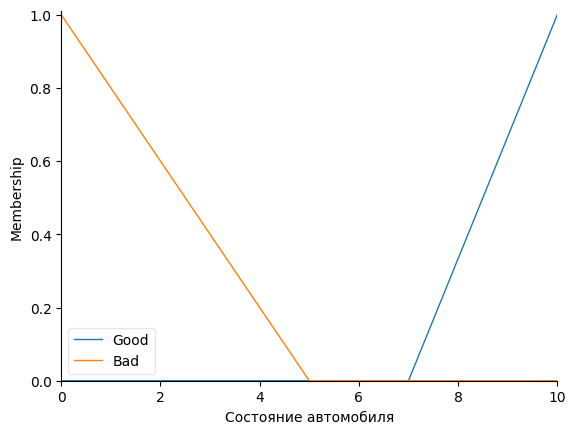

In [182]:
#№3 Определение функций принадлежности
# Функции принадлежности для состояния автомобиля
car_condition['Good'] = fuz.trimf(car_condition.universe, [7, 10, 10])
car_condition['Bad'] = fuz.trimf(car_condition.universe, [0, 0, 5])

car_condition.view()


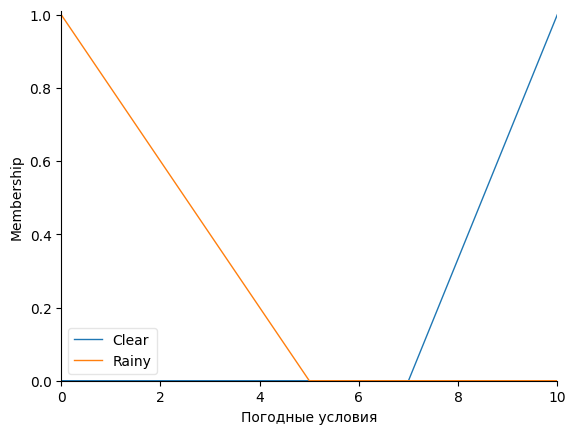

In [183]:
# Функции принадлежности для погодных условий
weather_condition['Clear'] = fuz.trimf(weather_condition.universe, [7, 10, 10])
weather_condition['Rainy'] = fuz.trimf(weather_condition.universe, [0, 0, 5])

weather_condition.view()


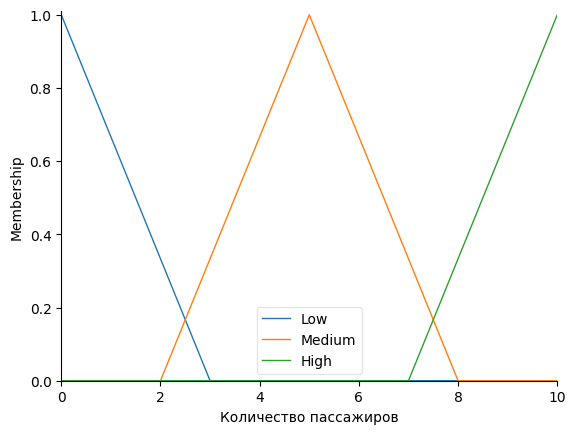

In [184]:
# Функции принадлежности для количества пассажиров
passengers['Low'] = fuz.trimf(passengers.universe, [0, 0, 3])
passengers['Medium'] = fuz.trimf(passengers.universe, [2, 5, 8])
passengers['High'] = fuz.trimf(passengers.universe, [7, 10, 10])

passengers.view()


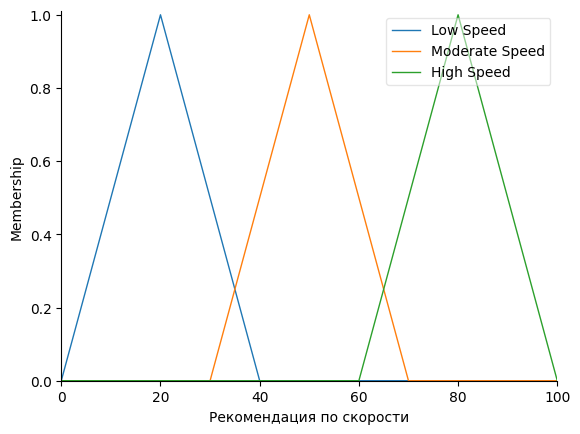

In [185]:
# Функции принадлежности для рекомендации по скорости
speed_recommendation['Low Speed'] = fuz.trimf(speed_recommendation.universe, [0, 20, 40])
speed_recommendation['Moderate Speed'] = fuz.trimf(speed_recommendation.universe, [30, 50, 70])
speed_recommendation['High Speed'] = fuz.trimf(speed_recommendation.universe, [60, 80, 100])

speed_recommendation.view()


In [186]:
#№4 Определение нечетких правил
# Нечеткие правила на основе комбинаций расстояния и скорости
rule1 = ctrl.Rule(car_condition['Good'] & weather_condition['Clear'] & (passengers['Low'] | passengers['Medium']), speed_recommendation['High Speed'])
rule2 = ctrl.Rule(car_condition['Good'] & weather_condition['Rainy'] & (passengers['Low'] | passengers['Medium']), speed_recommendation['Moderate Speed'])
rule3 = ctrl.Rule(car_condition['Bad'] & weather_condition['Clear'] & (passengers['Low'] | passengers['Medium']), speed_recommendation['Moderate Speed'])
rule4 = ctrl.Rule(car_condition['Bad'] & weather_condition['Rainy'] & (passengers['Low'] | passengers['Medium']), speed_recommendation['Low Speed'])
rule5 = ctrl.Rule(passengers['High'], speed_recommendation['Low Speed'])


In [187]:
#№5 Создание системы управления
# Создаем систему управления
speed_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
speed_simulation = ctrl.ControlSystemSimulation(speed_ctrl)


In [191]:
#№6 Фаззификация и вычисление результата
# Ввод конкретных значений
speed_simulation.input['Состояние автомобиля'] = 8  # Хорошее состояние
speed_simulation.input['Погодные условия'] = 3     # Дождливая погода
speed_simulation.input['Количество пассажиров'] = 4 # Среднее количество пассажиров

In [194]:
# 6.1
# Пример 2: Хорошее состояние, Ясная погода, Низкое количество пассажиров
speed_simulation.input['Состояние автомобиля'] = 9  # Хорошее состояние
speed_simulation.input['Погодные условия'] = 9     # Ясная погода
speed_simulation.input['Количество пассажиров'] = 1 # Низкое количество пассажиров

In [197]:
#6.2
# Пример 3: Плохое состояние автомобиля, дождливая погода, среднее количество пассажиров
speed_simulation.input['Состояние автомобиля'] = 2  # Плохое состояние
speed_simulation.input['Погодные условия'] = 1     # Дождливая погода
speed_simulation.input['Количество пассажиров'] = 9 # Высокое количество пассажиров

In [198]:
#№7 Вычисления
# Выполняем вычисление

# Применение метода дефаззификации SOM
speed_recommendation.defuzzify_method = 'som'

speed_simulation.compute()

Рекомендуемая скорость: 13.33 км/ч


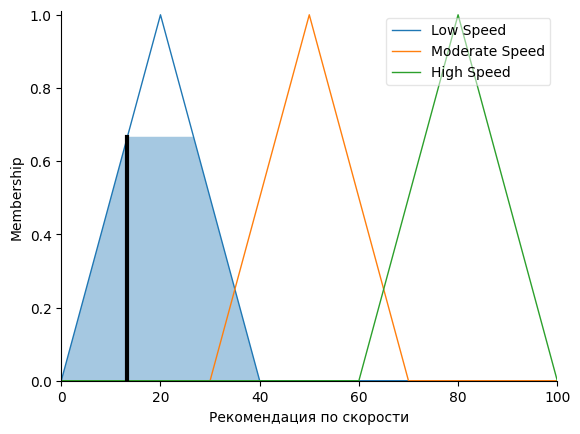

In [199]:
# №8 Вывод
print(f"Рекомендуемая скорость: {speed_simulation.output['Рекомендация по скорости']:.2f} км/ч")
speed_recommendation.view(sim=speed_simulation)